In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction import MinimalFCParameters
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

def norm_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val)


In [2]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
import pandas as pd
import os

# Lee tus datos
features = pd.read_csv('./data_medicina.csv')       # data training con el target
Y = pd.read_csv('y_train.csv')       # target
Y = Y['Target']
print(Y)
features = features.iloc[:,1:]   
num_cores = os.cpu_count()
X_test = pd.read_csv('features_test.csv')


X_test = X_test.iloc[:, 1:]

# Imputa los valores faltantes
X_train_imputed = impute(features)
X_test_imputed = impute(X_test)

# Selecciona las características relevantes para X_train
# haz un select_features mas restrictivo
features = select_features(X_train_imputed , Y  , n_jobs = num_cores)


#features = select_features(X_train_imputed , Y  , n_jobs = num_cores)

# Aplica la misma selección de características a X_test
X_test_selected = X_test_imputed[features.columns]

print(features.shape)
print(X_test_selected.shape)

# Selecciona las features mas relevantes
#features = select_features(features_imputed , Y  , n_jobs = num_cores)

#X_test = select_features(X_test_imputed , Y,n_jobs = num_cores)

x_sin_pca = features
print(x_sin_pca.shape)
print(Y.shape)

# guardar x_sin_pca y X_test_selected
#x_sin_pca.to_csv('features_sin_pca.csv', index=False)
#X_test_selected.to_csv('features_test_sin_pca.csv', index=False)






0      0
1      1
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202    0
203    1
Name: Target, Length: 204, dtype: int64


c:\Users\Jesus Egusquiza\Desktop\ciclo5\Machine Learning\proyecto2_2\env\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
c:\Users\Jesus Egusquiza\Desktop\ciclo5\Machine Learning\proyecto2_2\env\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


(204, 208)
(205, 208)
(204, 208)
(204,)



#PCA ANALYSIS






data scaled
[[-0.86723252  0.6243149  -0.79018102 ...  0.03354261 -0.25848713
   0.67522709]
 [-1.23886794  0.1983439  -0.99755834 ... -0.26727137  0.14080416
   1.22738112]
 [ 1.27418926  0.19491055  1.12539521 ... -0.02826451 -0.34941294
  -0.44781568]
 ...
 [-0.92833255 -0.92859496 -0.82050893 ...  0.01175625  0.0555435
   2.05375231]
 [ 1.04899794  0.00415125  0.77293574 ... -0.04943011 -0.35246599
  -0.83031547]
 [-1.42803659 -2.39407625 -1.09509945 ... -0.41962932  0.29277394
   1.56194284]]
max 13.641396742419687
min -12.42112104060243


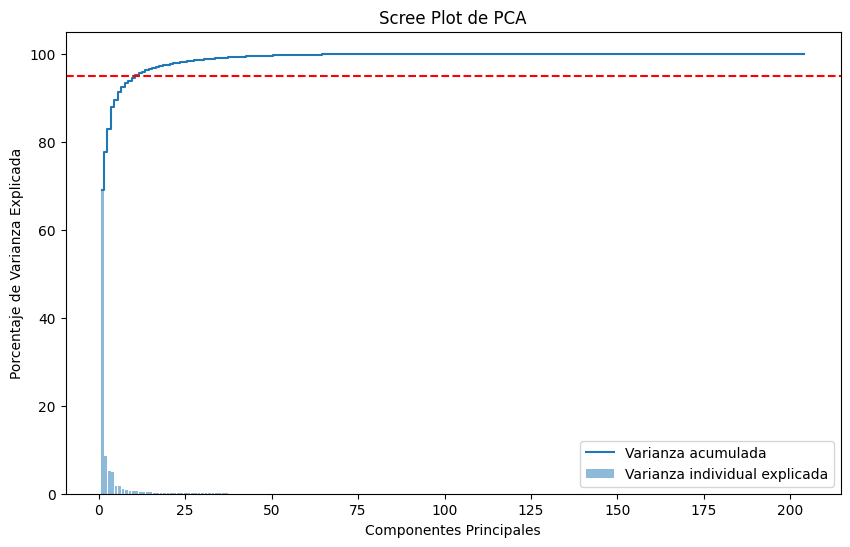

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)
print("data scaled")
print(data_scaled)
print("max", np.max(data_scaled))
print("min", np.min(data_scaled))
x_train_scaled = data_scaled


# ESCALAMOS LOS DATOS DE TEST
data_scaled_test = scaler.fit_transform(X_test_selected)
X_test_scaled = data_scaled_test
# Ajustar el PCA
pca = PCA()
pca.fit(x_train_scaled)


# Porcentaje de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100

# Número de componentes
num_componentes = np.arange(len(varianza_explicada)) + 1

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.bar(num_componentes, varianza_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(num_componentes, np.cumsum(varianza_explicada), where='mid', label='Varianza acumulada')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Scree Plot de PCA')
plt.legend(loc='best')
plt.axhline(y=95, color='r', linestyle='--')  # Línea opcional para el umbral de varianza deseado, ej. 95%
plt.show()


APLICANDO PCA CON LA DATA MAS RELEVANTE

In [4]:

# Seleccionar el número de componentes principales
pca2 = PCA(n_components=20)
pca2.fit(x_train_scaled)


eigen_vecs = pca2.components_
#print(eigen_vecs.shape)

# Transformar los datos al nuevo espacio
features_transformed = pca2.transform(x_train_scaled)      # features_transformed es un numpy array
features_imputed = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

# DATA CON PCA
X = features_imputed

print(X.shape)
print(Y.shape)

print(type(X))
print(type(Y))
features_transformed_test = pca2.transform(X_test_scaled)  # Aplica la transformación PCA a X_test_scaled
features_imputed_test = pd.DataFrame(features_transformed_test)

X_test = features_imputed_test
print(X_test.shape)

# guardar en csv el X, Y, X_test
X.to_csv('X.csv', index=False)
Y.to_csv('Y.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
print("Y")
print(Y)

(204, 20)
(204,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(205, 20)
Y
0      0
1      1
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202    0
203    1
Name: Target, Length: 204, dtype: int64


ENTRENANDO CON Regresion Logistica

Accuracy:  0.7258064516129032


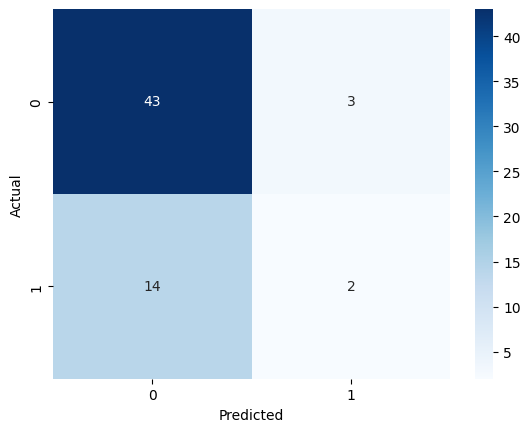

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import RL

#X = pd.DataFrame(features_transformed)

# normalizando los datos de PCA
X_rl = RL.norm_data(X)



# maximo valor de x_sin_pca

X_train, X_test, y_train, y_test = train_test_split(X_rl, Y, test_size=0.3, random_state=42)   # entrando con data pca

#X_train, X_test, y_train, y_test = train_test_split(x_sin_pca, Y, test_size=0.3, random_state=42)      # entrando con data original

LR = RL.modelo(alpha=0.02 ,epochs=20000 , epsilon=0.0001 )

# LR = RL.modelo(alpha=0.02 ,epochs=100000 , epsilon=0.0001 ) -> 74%
LR.train(X_train , y_train)


y_pred = LR.predict(X_test)

#get accuracy
from sklearn.metrics import accuracy_score
accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Prediccion con Regresion Logistica

In [9]:
LR = RL.modelo(alpha=0.02 ,epochs=20000 , epsilon=0.0001 )

LR.train(X_rl , Y)


X_test = pd.read_csv('X_test.csv')

X_test = RL.norm_data(X_test)

y_pred = LR.predict(X_test)

# convertir a enteros
y_pred = y_pred.astype(int)

# guardar en csv el X, Y, X_test
df_y_pred = pd.DataFrame(y_pred, columns=['result'])
df_y_pred.index += 1
df_y_pred.index.name = 'ID'
df_y_pred.to_csv("y_pred_RL3.csv")


# FIJA:
# epochs = 20000
# alpha = 0.02
# epsilon = 0.0001

ENTRENANDO CON DECISION TREE

Accuracy:  0.7903225806451613


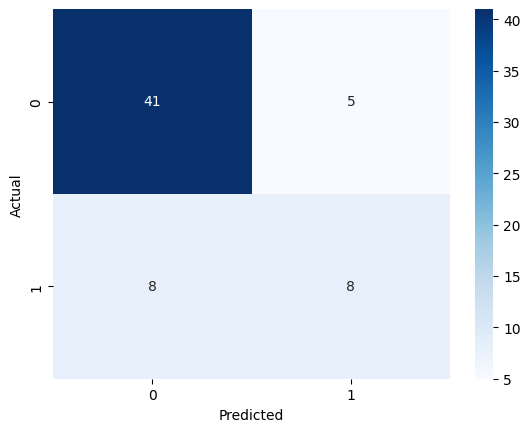

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import RL
from DT_optimizado import DT

#X = pd.DataFrame(features_transformed)
# normalizando los datos de PCA
X_rl = RL.norm_data(X)

# convertir a numpy array
X_rl = np.array(X_rl)
Y = np.array(Y)

# maximo valor de x_sin_pca

X_train, X_test, y_train, y_test = train_test_split(X_rl, Y, test_size=0.3, random_state=42)   


# ENTRENAMIENTO CON DECISION TREE
modelo = DT(max_depth=4)        # max_depth = 4 mejor score kaggle

modelo.fit(X_train , y_train)



y_pred = modelo.predict_2(X_test)

#get accuracy
from sklearn.metrics import accuracy_score
accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

#create confusion matrix
from sklearn.metrics import confusion_matrix

#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


TESTING Y GUARDAR DATA

In [63]:
modelo = DT(max_depth=4)
# LR = RL.modelo(alpha=0.02 ,epochs=100000 , epsilon=0.0001 ) -> 74%
modelo.fit(X_rl , Y)


X_test = pd.read_csv('X_test.csv')

X_test = RL.norm_data(X_test)

X_test = np.array(X_test)

y_pred = modelo.predict_2(X_test)

# convertir a enteros
y_pred = y_pred.astype(int)

# guardar en csv el X, Y, X_test
df_y_pred = pd.DataFrame(y_pred, columns=['result'])
df_y_pred.index += 1
df_y_pred.index.name = 'ID'
df_y_pred.to_csv("y_pred_DT3.csv")


# FIJA:
# epochs = 20000
# alpha = 0.02
# epsilon = 0.0001